In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

%matplotlib inline
pd.options.display.max_rows = 68
pd.options.display.max_columns = 68

In [112]:
# read the sequences file
arquivo = 'hikoyu_fasta.txt'

file_content = open(arquivo, "r")

all_lines = file_content.readlines();

sequences = {}
sequences_info = {}
description = ''

for line in all_lines:
    
    sequence = []
    
    if ">" in line:
        description = line
        sequence = []
        sequences[description] = sequence
    else:
        sequences[description].append(line)
        
file_content.close()

In [113]:
#count A,T,C,G,AA,AT,AC,AG,TT,TA,TC,TG,CC,CA,CT,CG,GG,GA,GT,GC for each sequence

for description in sequences:
    
    sequences_info[description] = {}
    
    sequences_info[description]['A'] = 0
    sequences_info[description]['T'] = 0
    sequences_info[description]['C'] = 0
    sequences_info[description]['G'] = 0
    
    sequences_info[description]['AA'] = 0
    sequences_info[description]['AT'] = 0
    sequences_info[description]['AC'] = 0
    sequences_info[description]['AG'] = 0
    
    sequences_info[description]['TA'] = 0
    sequences_info[description]['TT'] = 0
    sequences_info[description]['TC'] = 0
    sequences_info[description]['TG'] = 0
    
    sequences_info[description]['CA'] = 0
    sequences_info[description]['CT'] = 0
    sequences_info[description]['CC'] = 0
    sequences_info[description]['CG'] = 0
    
    sequences_info[description]['GA'] = 0
    sequences_info[description]['GT'] = 0
    sequences_info[description]['GC'] = 0
    sequences_info[description]['GG'] = 0
    
    sequences_info[description]['SIZE'] = 0
    
    #key = '>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n'

    for line in sequences[description]:
        
        sequences_info[description]['SIZE'] += len(line)
        sequences_info[description]['A'] += line.count('A')
        sequences_info[description]['T'] += line.count('T')
        sequences_info[description]['C'] += line.count('C')
        sequences_info[description]['G'] += line.count('G')
        
        sequences_info[description]['AA'] += line.count('AA')
        sequences_info[description]['AT'] += line.count('AT')
        sequences_info[description]['AC'] += line.count('AC')
        sequences_info[description]['AG'] += line.count('AG')
    
        sequences_info[description]['TA'] += line.count('AT')
        sequences_info[description]['TT'] += line.count('TT')
        sequences_info[description]['TC'] += line.count('TC')
        sequences_info[description]['TG'] += line.count('TG')
    
        sequences_info[description]['CA'] += line.count('CA')
        sequences_info[description]['CT'] += line.count('CT')
        sequences_info[description]['CC'] += line.count('CC')
        sequences_info[description]['CG'] += line.count('CG')
    
        sequences_info[description]['GA'] += line.count('GA')
        sequences_info[description]['GT'] += line.count('GT')
        sequences_info[description]['GC'] += line.count('GC')
        sequences_info[description]['GG'] += line.count('GG')   
    

In [114]:
#calc nucleotideo bias

for description in sequences:
         
    fA = sequences_info[description]['A'] / sequences_info[description]['SIZE'] 
    fT = sequences_info[description]['T'] / sequences_info[description]['SIZE']
    fC = sequences_info[description]['C'] / sequences_info[description]['SIZE']
    fG = sequences_info[description]['G'] / sequences_info[description]['SIZE'] 
        
    fAA = sequences_info[description]['AA'] / sequences_info[description]['SIZE']       
    fAT = sequences_info[description]['AT'] / sequences_info[description]['SIZE']       
    fAC = sequences_info[description]['AC'] / sequences_info[description]['SIZE']       
    fAG = sequences_info[description]['AG'] / sequences_info[description]['SIZE']    
      
    fTA = sequences_info[description]['TA'] / sequences_info[description]['SIZE']       
    fTT = sequences_info[description]['TT'] / sequences_info[description]['SIZE']       
    fTC = sequences_info[description]['TC'] / sequences_info[description]['SIZE']       
    fTG = sequences_info[description]['TG'] / sequences_info[description]['SIZE']       

    fCA = sequences_info[description]['CA'] / sequences_info[description]['SIZE']       
    fCT = sequences_info[description]['CT'] / sequences_info[description]['SIZE']       
    fCC = sequences_info[description]['CC'] / sequences_info[description]['SIZE']       
    fCG = sequences_info[description]['CG'] / sequences_info[description]['SIZE']       

    fGA = sequences_info[description]['GA'] / sequences_info[description]['SIZE']       
    fGT = sequences_info[description]['GT'] / sequences_info[description]['SIZE']       
    fGC = sequences_info[description]['GC'] / sequences_info[description]['SIZE']       
    fGG = sequences_info[description]['GG'] / sequences_info[description]['SIZE']
        
   # sequences_info[description]['fA'] = fA
    sequences_info[description]['fT'] = fT
    sequences_info[description]['fC'] = fC
    sequences_info[description]['fG'] = fG
       
    sequences_info[description]['pAA'] = fAA/(fA*fA)
    sequences_info[description]['pAT'] = fAT/(fA*fT)
    sequences_info[description]['pAC'] = fAC/(fA*fC)
    sequences_info[description]['pAG'] = fAC/(fA*fG)

    sequences_info[description]['pTA'] = fTA/(fT*fA)
    sequences_info[description]['pTT'] = fTT/(fT*fT)
    sequences_info[description]['pTC'] = fTC/(fT*fC)
    sequences_info[description]['pTG'] = fTC/(fT*fG)
      
    sequences_info[description]['pCA'] = fCA/(fC*fA)
    sequences_info[description]['pCT'] = fCT/(fC*fT)
    sequences_info[description]['pCC'] = fCC/(fC*fC)
    sequences_info[description]['pCG'] = fCC/(fC*fG)

    sequences_info[description]['pGA'] = fGA/(fG*fA)
    sequences_info[description]['pGT'] = fGT/(fG*fT)
    sequences_info[description]['pGC'] = fGC/(fG*fC)
    sequences_info[description]['pGG'] = fGC/(fG*fG)


In [115]:
#creating a dataframe
df_original = pd.DataFrame.from_dict(sequences_info, orient='index', columns=[ 'fT', 'fC', 'fG',
                                                                     'pAA','pAT', 'pAC', 'pAG',
                                                                     'pTA','pTA', 'pTC', 'pTG',
                                                                     'pCA','pCT', 'pCC', 'pCG',
                                                                     'pGA','pGT', 'pGC', 'pGG'])

In [116]:
df_original

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
">LC521925.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/AI/I-004/2020 RNA, complete genome\n",0.315989,0.180782,0.192876,0.814654,0.806423,1.234053,1.156674,0.806423,0.806423,0.798955,0.748858,1.268780,1.173915,0.778408,0.729599,0.922433,1.054349,1.092509,1.024005
">LC522972.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/KY/V-029/2020 RNA, complete genome\n",0.315874,0.180702,0.193014,0.810024,0.803949,1.230599,1.152099,0.803949,0.803949,0.793040,0.742452,1.268397,1.171392,0.781350,0.731508,0.925856,1.056712,1.094903,1.025059
">LC522973.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-012/2020 RNA, complete genome\n",0.315874,0.180702,0.193014,0.810024,0.803595,1.231218,1.152679,0.803595,0.803595,0.793040,0.742452,1.269636,1.170815,0.781350,0.731508,0.925856,1.057792,1.093015,1.023291
">LC522974.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-501/2020 RNA, complete genome\n",0.315841,0.180735,0.193014,0.810024,0.803678,1.230994,1.152679,0.803678,0.803678,0.792978,0.742529,1.269405,1.171301,0.781066,0.731375,0.925856,1.057362,1.093759,1.024175
">LC522975.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-521/2020 RNA, complete genome\n",0.315874,0.180735,0.192981,0.810024,0.803949,1.230994,1.152876,0.803949,0.803949,0.792896,0.742579,1.269405,1.171179,0.781066,0.731500,0.926014,1.057432,1.093946,1.024525
">LC528232.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-020 RNA, complete genome\n",0.315944,0.180685,0.192921,0.814567,0.805178,1.237662,1.159161,0.805178,0.805178,0.797475,0.746893,1.267381,1.174892,0.781863,0.732271,0.928952,1.051263,1.092745,1.023435
">LC528233.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-027 RNA, complete genome\n",0.315812,0.180882,0.193053,0.812233,0.812790,1.230334,1.152770,0.812790,0.812790,0.795785,0.745616,1.273037,1.183313,0.780157,0.730974,0.922564,1.060156,1.087983,1.019393
">LR757995.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.315739,0.180770,0.192986,0.809302,0.802430,1.228755,1.150975,0.802430,0.802430,0.805350,0.754371,1.265296,1.174565,0.778896,0.729592,0.928786,1.062388,1.093916,1.024672
">LR757996.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.315682,0.180728,0.193012,0.812820,0.804968,1.229523,1.151275,0.804968,0.804968,0.800594,0.749644,1.269165,1.183864,0.768271,0.719377,0.912320,1.051771,1.077178,1.008625
">LR757997.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.204197,0.121159,0.127318,1.234154,1.215346,1.869932,1.779483,1.215346,1.215346,1.250011,1.189548,1.934660,1.801964,1.139999,1.084857,1.392103,1.614387,1.672849,1.591933


In [117]:
df_original.describe()

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.314068,0.179923,0.192076,0.817317,0.811691,1.240652,1.162391,0.811691,0.811691,0.808621,0.757616,1.275217,1.185049,0.782912,0.733518,0.929218,1.065670,1.094705,1.025653
std,0.013531,0.007245,0.008001,0.051361,0.049782,0.077522,0.076066,0.049782,0.049782,0.054507,0.053303,0.081299,0.076198,0.044135,0.043460,0.057190,0.067649,0.071326,0.069852
min,0.204197,0.121159,0.127318,0.801577,0.797302,1.220872,1.130422,0.797302,0.797302,0.792817,0.742452,1.249456,1.170458,0.755781,0.699788,0.904548,1.040314,1.074207,1.005950
25%,0.315690,0.180698,0.192925,0.810307,0.804619,1.229262,1.151590,0.804619,0.804619,0.800435,0.749648,1.262185,1.171708,0.777604,0.728317,0.921530,1.057355,1.084303,1.015506
50%,0.315817,0.180738,0.192982,0.810746,0.805674,1.230994,1.152789,0.805674,0.805674,0.802656,0.751783,1.263524,1.172240,0.778573,0.729268,0.922901,1.058424,1.085353,1.016606
75%,0.315877,0.180806,0.193015,0.811911,0.806324,1.232007,1.153975,0.806324,0.806324,0.803352,0.752536,1.269360,1.179474,0.779217,0.729757,0.923821,1.059058,1.088547,1.019695
max,0.316031,0.183966,0.198686,1.234154,1.215346,1.869932,1.779483,1.215346,1.215346,1.250011,1.189548,1.934660,1.801964,1.139999,1.084857,1.392103,1.614387,1.672849,1.591933


In [118]:
#standardization
#Useful: https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
scaler = StandardScaler()
std_data = scaler.fit_transform(df_original.values)
df_std = pd.DataFrame(std_data, index=df_original.index, columns=df_original.columns)

In [119]:
df_std

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
">LC521925.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/AI/I-004/2020 RNA, complete genome\n",0.143007,0.119374,0.100608,-0.052242,-0.106613,-0.085753,-0.075714,-0.106613,-0.106613,-0.178660,-0.165536,-0.079765,-0.147196,-0.102811,-0.090833,-0.119518,-0.168595,-0.031020,-0.023765
">LC522972.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/KY/V-029/2020 RNA, complete genome\n",0.134478,0.108280,0.118074,-0.143051,-0.156670,-0.130643,-0.136311,-0.156670,-0.156670,-0.287977,-0.286607,-0.084519,-0.180554,-0.035642,-0.046586,-0.059225,-0.133402,0.002789,-0.008572
">LC522973.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-012/2020 RNA, complete genome\n",0.134478,0.108280,0.118074,-0.143051,-0.163844,-0.122591,-0.128628,-0.163844,-0.163844,-0.287977,-0.286607,-0.069162,-0.188180,-0.035642,-0.046586,-0.059225,-0.117320,-0.023874,-0.034061
">LC522974.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-501/2020 RNA, complete genome\n",0.132027,0.112858,0.118074,-0.143051,-0.162148,-0.125505,-0.128628,-0.162148,-0.162148,-0.289120,-0.285144,-0.072028,-0.181761,-0.042139,-0.049674,-0.059225,-0.123720,-0.013357,-0.021317
">LC522975.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-521/2020 RNA, complete genome\n",0.134478,0.112858,0.113929,-0.143051,-0.156670,-0.125505,-0.126024,-0.156670,-0.156670,-0.290647,-0.284213,-0.072028,-0.183375,-0.042139,-0.046782,-0.056442,-0.122675,-0.010722,-0.016277
">LC528232.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-020 RNA, complete genome\n",0.139629,0.105913,0.106372,-0.053947,-0.131797,-0.038852,-0.042784,-0.131797,-0.131797,-0.206010,-0.202666,-0.097106,-0.134275,-0.023951,-0.028896,-0.004682,-0.214543,-0.027685,-0.031987
">LC528233.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-027 RNA, complete genome\n",0.129833,0.133356,0.122938,-0.099731,0.022234,-0.134079,-0.127421,0.022234,0.022234,-0.237243,-0.226804,-0.027014,-0.022951,-0.062876,-0.058974,-0.117213,-0.082108,-0.094947,-0.090287
">LR757995.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.124415,0.117823,0.114583,-0.157213,-0.187407,-0.154601,-0.151195,-0.187407,-0.187407,-0.060460,-0.061330,-0.122943,-0.138611,-0.091661,-0.090997,-0.007611,-0.048868,-0.011138,-0.014154
">LR757996.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.120156,0.111976,0.117784,-0.088216,-0.136048,-0.144624,-0.147227,-0.136048,-0.136048,-0.148353,-0.150683,-0.074997,-0.015664,-0.334201,-0.327788,-0.297670,-0.206977,-0.247560,-0.245584
">LR757997.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",-8.180079,-8.170994,-8.153601,8.176130,8.168760,8.177771,8.172884,8.168760,8.168760,8.158020,8.163594,8.171664,8.156374,8.151020,8.144333,8.154029,8.171515,8.165892,8.167087


In [120]:
#create a distance matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

distance_matrix = pd.DataFrame(
   # squareform(pdist(df_original))
    squareform(pdist(df_std, metric='euclidean'))
  #  columns = df_original.index,
  #  index = df_original.index
)


In [121]:
distance_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,0.000000,0.249825,0.253025,0.247894,0.245639,0.182872,0.319294,0.309548,0.520385,36.052111,0.286914,1.593084,0.252905,0.491867,0.252348,0.243232,0.322714,0.322714,0.236973,0.260080,0.226760,0.205351,0.235399,0.396535,0.541723,0.331096,0.897134,0.236953,0.252891,0.399517,0.243831,0.248125,0.244959,0.233093,0.224578,0.515539,0.243232,0.243232,0.237632,0.237632,0.230705,0.237586,0.192387,0.229397,0.239050,0.251754,0.276677,0.288007,0.555812,0.255659,0.223838,0.269150,0.230025,0.295819,0.255259,0.230122,0.228291,0.240768,0.202893,0.336471,0.300210,0.267263,0.206091,0.282545,0.282545,0.284204,0.282545,0.428519
1,0.249825,0.000000,0.046814,0.030528,0.027462,0.233854,0.395065,0.353454,0.647608,36.135129,0.401264,1.700016,0.351372,0.617281,0.369854,0.368198,0.434763,0.434763,0.357148,0.380972,0.339700,0.339096,0.344943,0.442832,0.661478,0.505382,1.031451,0.363185,0.335183,0.573306,0.345062,0.347163,0.334746,0.344850,0.339863,0.589323,0.368198,0.368198,0.339134,0.339134,0.343374,0.062763,0.253410,0.337444,0.342340,0.373982,0.303402,0.401675,0.687612,0.389551,0.340739,0.308995,0.349209,0.383245,0.390054,0.344910,0.353726,0.352709,0.248920,0.387117,0.483952,0.436370,0.329967,0.399845,0.399845,0.399408,0.399845,0.485641
2,0.253025,0.046814,0.000000,0.021510,0.028634,0.236470,0.394330,0.352826,0.634054,36.142843,0.397115,1.703323,0.341079,0.596374,0.356940,0.353916,0.417720,0.417720,0.344663,0.367480,0.328660,0.336378,0.333303,0.426803,0.641810,0.500784,1.026844,0.349388,0.324614,0.562387,0.336100,0.334057,0.322650,0.333111,0.327603,0.581000,0.353916,0.353916,0.323441,0.323441,0.332705,0.059633,0.249545,0.324473,0.333554,0.361355,0.305821,0.391458,0.671533,0.375312,0.327134,0.308219,0.337262,0.378290,0.375681,0.331100,0.340519,0.338470,0.242574,0.383460,0.493814,0.429677,0.320553,0.388720,0.388720,0.387443,0.388720,0.463530
3,0.247894,0.030528,0.021510,0.000000,0.013242,0.233930,0.393392,0.350543,0.634806,36.140292,0.398033,1.697937,0.345016,0.600750,0.361265,0.358596,0.422730,0.422730,0.348711,0.372865,0.332803,0.331557,0.337501,0.427334,0.647750,0.499818,1.023368,0.353830,0.329398,0.564437,0.339591,0.339367,0.327540,0.337326,0.331827,0.581194,0.358596,0.358596,0.329281,0.329281,0.337117,0.049984,0.248436,0.329729,0.336878,0.365907,0.299422,0.394869,0.673535,0.379668,0.331991,0.305764,0.340729,0.375644,0.380247,0.335923,0.344306,0.343872,0.243941,0.382371,0.484793,0.427721,0.323533,0.392275,0.392275,0.391274,0.392275,0.470349
4,0.245639,0.027462,0.028634,0.013242,0.000000,0.231349,0.388451,0.352341,0.640132,36.132767,0.393859,1.699430,0.347856,0.607115,0.363777,0.360551,0.425888,0.425888,0.350721,0.374060,0.334029,0.334323,0.339642,0.433830,0.653376,0.498571,1.025998,0.355675,0.331849,0.564252,0.341806,0.341236,0.330315,0.339403,0.333312,0.582932,0.360551,0.360551,0.331386,0.331386,0.338143,0.048302,0.250922,0.331099,0.339169,0.367610,0.303646,0.397817,0.678504,0.380862,0.332982,0.306526,0.342999,0.377102,0.381800,0.337932,0.346399,0.345708,0.243666,0.389698,0.483002,0.428730,0.323872,0.395041,0.395041,0.394348,0.395041,0.477133
5,0.182872,0.233854,0.236470,0.233930,0.231349,0.000000,0.387346,0.351951,0.640245,36.018529,0.348862,1.676169,0.338251,0.588795,0.343381,0.335050,0.417557,0.417557,0.328371,0.333109,0.311493,0.295010,0.322071,0.409032,0.658225,0.453178,0.926404,0.327619,0.329428,0.508929,0.333064,0.327281,0.319239,0.320130,0.310085,0.505519,0.335050,0.335050,0.308701,0.308701,0.316528,0.221927,0.285455,0.306265,0.331089,0.337154,0.327415,0.381854,0.671545,0.346047,0.301783,0.299948,0.329613,0.398636,0.347108,0.315609,0.325144,0.320710,0.061424,0.399699,0.432937,0.345614,0.295208,0.377562,0.377562,0.380265,0.377562,0.515888
6,0.319294,0.395065,0.394330,0.393392,0.388451,0.387346,0.000000,0.495463,0.577812,35.983469,0.197083,1.544924,0.40

In [122]:
#create an adjacency matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

adj_matrix_0_018 = distance_matrix.copy()
adj_matrix_0_036 = distance_matrix.copy()
adj_matrix_0_055 = distance_matrix.copy()
adj_matrix_0_075 = distance_matrix.copy()
adj_matrix_2_0   = distance_matrix.copy()

In [123]:
#applying the thresholds
adj_matrix_0_018 = adj_matrix_0_018.applymap(lambda x: 1 if x <= 0.018 else 0)

In [124]:
adj_matrix_0_018

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


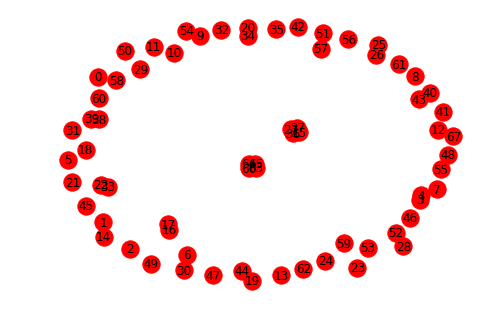

In [125]:
#creating graphs
#https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_adjacency.html

G=nx.from_pandas_adjacency(adj_matrix_0_018)
#print(nx.info(G))

#G = nx.from_numpy_matrix(adj_matrix_0_018.values, parallel_edges=True, 
#                         create_using=nx.MultiDiGraph())
#nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_size=50, node_color="red")
#nx.draw_networkx_edges(G, pos=nx.spring_layout(G), width=40, edge_color="black")

nx.draw(G, with_labels=True)
plt.show()

In [126]:
adj_matrix_0_036 = adj_matrix_0_036.applymap(lambda x: 1 if x <= 0.036 else 0)

In [127]:
adj_matrix_0_036

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


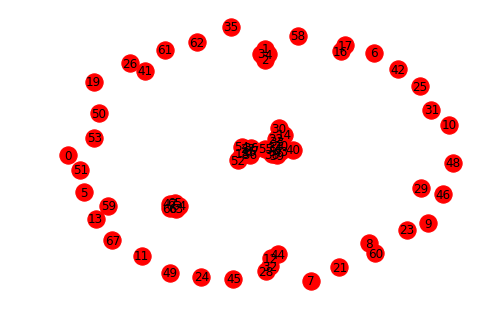

In [128]:
G=nx.from_pandas_adjacency(adj_matrix_0_036)
nx.draw(G, with_labels=True)
plt.show()

In [129]:
adj_matrix_0_055 = adj_matrix_0_055.applymap(lambda x: 1 if x <= 0.055 else 0)

In [130]:
adj_matrix_0_055

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


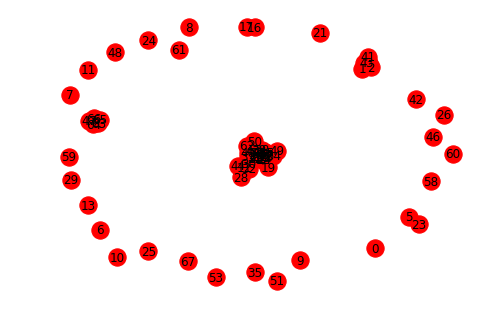

In [131]:
G=nx.from_pandas_adjacency(adj_matrix_0_055)
nx.draw(G, with_labels=True)
plt.show()

In [132]:
adj_matrix_0_075 = adj_matrix_0_075.applymap(lambda x: 1 if x <= 0.075 else 0)

In [133]:
adj_matrix_0_075

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


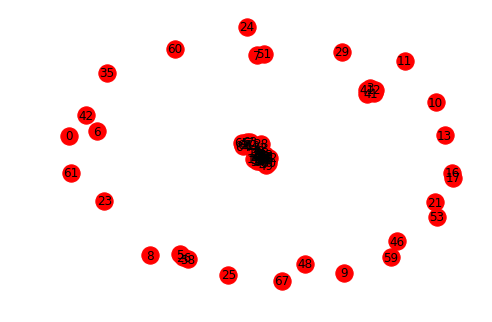

In [134]:
G=nx.from_pandas_adjacency(adj_matrix_0_075)
nx.draw(G, with_labels=True)
plt.show()

In [135]:
adj_matrix_2_0 = adj_matrix_2_0.applymap(lambda x: 1 if x <= 2.0 else 0)

In [136]:
adj_matrix_2_0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


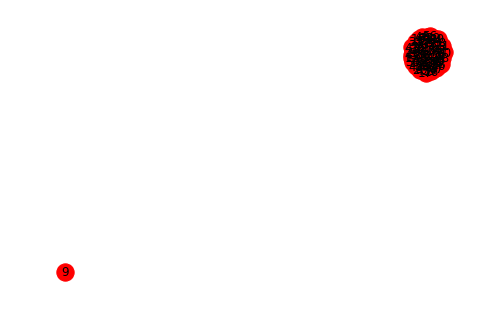

In [137]:
G=nx.from_pandas_adjacency(adj_matrix_2_0)
nx.draw(G, with_labels=True)
plt.show()